# Bussiness probelm: Predict the used car prices for future data

# Importing the data and understanding the data
- Extracting the data
- Loading the data with necessary libraries

In [3]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

- Loading the data

In [5]:
df=pd.read_csv('car_data.csv')

In [6]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

- The dataset contains 301 records and 9 columns

In [9]:
df.columns.tolist()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

- Here all the columns are in as per the syntax no need modificatio in the columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- There are no null values in the dataset

In [14]:
df.duplicated().sum()

2

- There are 2 duplicate values

# Exploratory Data Analysis

In [17]:
df['Car_Name'].nunique()

98

- 98 different types of similar records are avilable

In [19]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [20]:
sorted(df['Year'].unique(),reverse=True)

[2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003]

In [21]:
df['Year'].nunique()

16

- The cars which are manufactured in the year 2003 to 2018 data is available

In [23]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [24]:
df['Selling_Price'].nunique()

156

In [25]:
df['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [26]:
df['Present_Price'].nunique()

147

In [27]:
df['Kms_Driven'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [28]:
df['Kms_Driven'].nunique()

206

In [29]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [30]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [31]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

# Data Clenaning

In [34]:
df.drop_duplicates(inplace=True)

# Exploaratory Analyis Of The Data

- Visualizing The Outliers

Text(0.5, 1.0, 'Boxplot of Present Price')

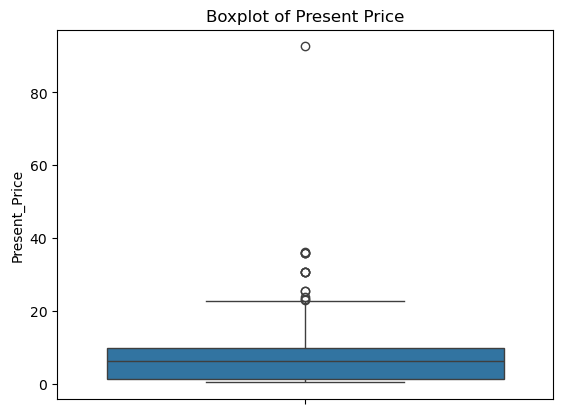

In [37]:
sns.boxplot(df['Present_Price'])
plt.title('Boxplot of Present Price')

In [38]:
#using IQR identifying the outliers
q1=df['Present_Price'].quantile(0.25)
q3=df['Present_Price'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q3+1.5*IQR
df[(df['Present_Price']<lowerbound) | (df['Present_Price']>upperbound)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
78,corolla altis,2010,5.25,22.83,80000,Petrol,Dealer,Automatic,0
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0


<Axes: xlabel='Present_Price', ylabel='Count'>

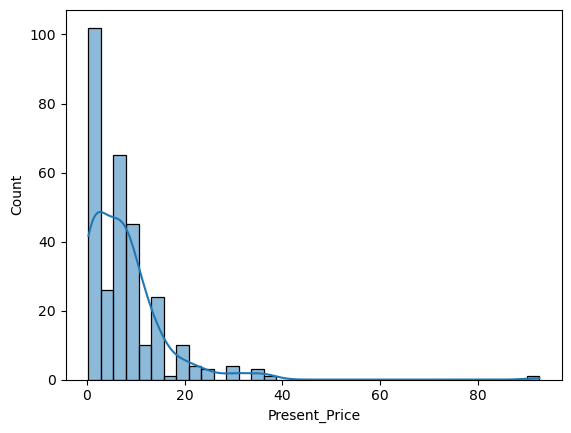

In [39]:
sns.histplot(df['Present_Price'],kde=True)

In [40]:
df[df["Present_Price"]==df['Present_Price'].max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [41]:
df[df['Present_Price']==df['Present_Price'].min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0


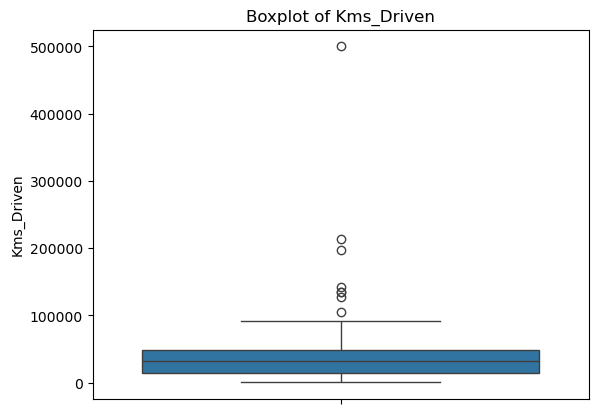

In [42]:
sns.boxplot(df['Kms_Driven'])
plt.title('Boxplot of Kms_Driven')
plt.show()

In [43]:
# identifying the outliers
q1=df['Kms_Driven'].quantile(0.25)
q3=df['Kms_Driven'].quantile(0.75)
IQR=q3-q1
lowerbound=q1-1.5*IQR
upperbound=q3+1.5*IQR
df[(df['Kms_Driven']<lowerbound) | (df['Kms_Driven']>upperbound)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


<Axes: xlabel='Kms_Driven', ylabel='Count'>

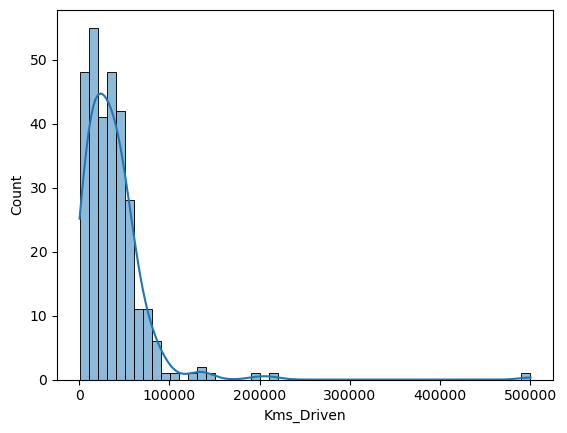

In [44]:
sns.histplot(df['Kms_Driven'],kde=True)

In [45]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [46]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [47]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64

In [48]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [49]:
df[df['Car_Name']=='Activa 4g']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
173,Activa 4g,2017,0.4,0.51,1300,Petrol,Individual,Automatic,0


In [50]:
df.drop(index=173,inplace=True)

In [51]:
df[df['Car_Name']=='Activa 3g']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [52]:
df.drop(index=[165,196],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       296 non-null    object 
 1   Year           296 non-null    int64  
 2   Selling_Price  296 non-null    float64
 3   Present_Price  296 non-null    float64
 4   Kms_Driven     296 non-null    int64  
 5   Fuel_Type      296 non-null    object 
 6   Seller_Type    296 non-null    object 
 7   Transmission   296 non-null    object 
 8   Owner          296 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.1+ KB


In [54]:
df[['Present_Price','Kms_Driven']].skew()

Present_Price    4.189615
Kms_Driven       2.193796
dtype: float64

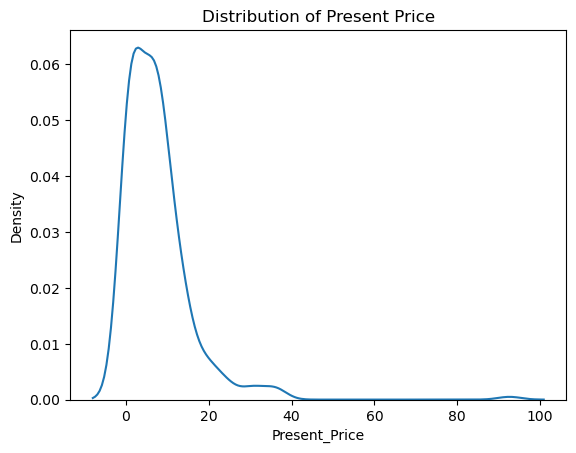

In [55]:
sns.kdeplot(df['Present_Price'])
plt.title('Distribution of Present Price')
plt.show()

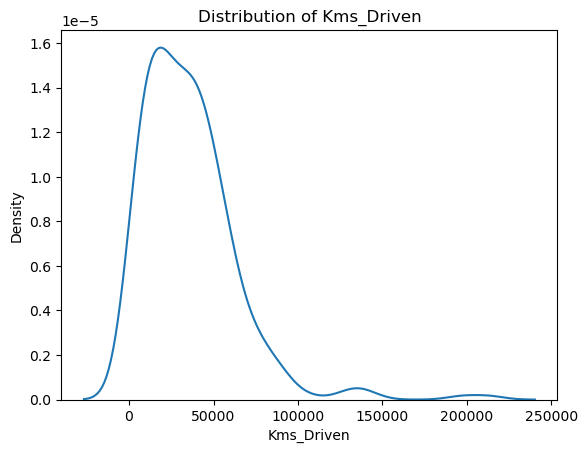

In [56]:
sns.kdeplot(df['Kms_Driven'])
plt.title('Distribution of Kms_Driven')
plt.show()

In [57]:
categorical=['Fuel_Type','Seller_Type','Transmission']

In [58]:
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

In [59]:
df_encoded.replace({True:1,False:0},inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_24548\4256386520.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({True:1,False:0},inplace=True)


In [60]:
df_encoded

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1


In [61]:
df_encoded.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.237386,-0.054129,-0.619264,-0.183430,0.057185,-0.052871,-0.037779,0.004076
Selling_Price,0.237386,1.000000,0.875502,0.082089,-0.089743,0.541962,-0.529935,-0.549279,-0.385863
Present_Price,-0.054129,0.875502,1.000000,0.324237,0.008521,0.462915,-0.454710,-0.506880,-0.369662
Kms_Driven,-0.619264,0.082089,0.324237,1.000000,0.132137,0.263616,-0.264538,-0.205400,-0.109541
Owner,-0.183430,-0.089743,0.008521,0.132137,1.000000,-0.052780,0.055070,0.127239,-0.058778
Fuel_Type_Diesel,0.057185,0.541962,0.462915,0.263616,-0.052780,1.000000,-0.979052,-0.342764,-0.102755
Fuel_Type_Petrol,-0.052871,-0.529935,-0.454710,-0.264538,0.055070,-0.979052,1.000000,0.350706,0.095201
Seller_Type_Individual,-0.037779,-0.549279,-0.506880,-0.205400,0.127239,-0.342764,0.350706,1.000000,0.098236
Transmission_Manual,0.004076,-0.385863,-0.369662,-0.109541,-0.058778,-0.102755,0.095201,0.098236,1.000000


In [62]:
df_encoded.corr(numeric_only=True)['Selling_Price']

Year                      0.237386
Selling_Price             1.000000
Present_Price             0.875502
Kms_Driven                0.082089
Owner                    -0.089743
Fuel_Type_Diesel          0.541962
Fuel_Type_Petrol         -0.529935
Seller_Type_Individual   -0.549279
Transmission_Manual      -0.385863
Name: Selling_Price, dtype: float64

In [63]:
df_encoded.drop('Car_Name',axis=1,inplace=True)

In [64]:
df_encoded.drop('Owner',axis=1,inplace=True)

In [65]:
df_encoded.skew()

Year                     -1.249236
Selling_Price             2.532435
Present_Price             4.189615
Kms_Driven                2.193796
Fuel_Type_Diesel          1.539854
Fuel_Type_Petrol         -1.486588
Seller_Type_Individual    0.641586
Transmission_Manual      -2.327125
dtype: float64

In [66]:
df_encoded['Present_Price']=np.log(df_encoded['Present_Price'])

In [67]:
transform,formatted=boxcox(df_encoded['Kms_Driven'])
df_encoded['Kms_Driven']=transform

In [68]:
df_encoded.skew()

Year                     -1.249236
Selling_Price             2.532435
Present_Price            -0.382938
Kms_Driven               -0.007190
Fuel_Type_Diesel          1.539854
Fuel_Type_Petrol         -1.486588
Seller_Type_Individual    0.641586
Transmission_Manual      -2.327125
dtype: float64

In [69]:
df_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,1,0,1
1,2013,4.75,2.255493,116.919996,1,0,0,1
2,2017,7.25,2.287471,60.252218,0,1,0,1
3,2011,2.85,1.423108,54.300312,0,1,0,1
4,2014,4.60,1.927164,116.381220,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,2.451005,107.449775,1,0,0,1
297,2015,4.00,1.774952,131.742217,0,1,0,1
298,2009,3.35,2.397895,151.021928,0,1,0,1
299,2017,11.50,2.525729,66.406442,1,0,0,1


In [70]:
df_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,1,0,1
1,2013,4.75,2.255493,116.919996,1,0,0,1
2,2017,7.25,2.287471,60.252218,0,1,0,1
3,2011,2.85,1.423108,54.300312,0,1,0,1
4,2014,4.60,1.927164,116.381220,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,2.451005,107.449775,1,0,0,1
297,2015,4.00,1.774952,131.742217,0,1,0,1
298,2009,3.35,2.397895,151.021928,0,1,0,1
299,2017,11.50,2.525729,66.406442,1,0,0,1


In [71]:
#df_encoded.drop(columns='Fuel_Type_Petrol',inplace=True)

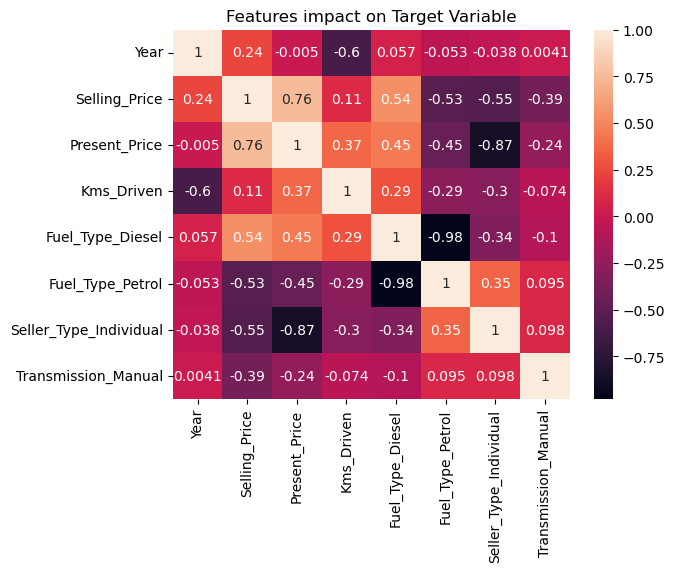

In [72]:
sns.heatmap(df_encoded.corr(numeric_only=True),annot=True)
plt.title('Features impact on Target Variable')
plt.show()

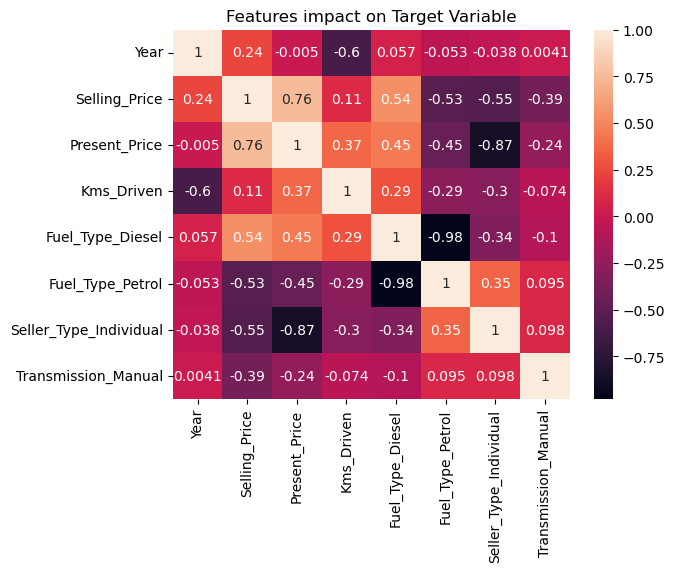

In [73]:
sns.heatmap(df_encoded.corr(numeric_only=True),annot=True)
plt.title('Features impact on Target Variable')
plt.show()

In [74]:
'''vif_Data=pd.DataFrame()
x=df_encoded.drop(columns='Selling_Price')
x
vif_Data['feature']=x.columns
vif_Data['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]'''

"vif_Data=pd.DataFrame()\nx=df_encoded.drop(columns='Selling_Price')\nx\nvif_Data['feature']=x.columns\nvif_Data['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]"

In [75]:
'''vif_Data'''

'vif_Data'

In [76]:
df_encoded.to_excel('PCA_Cleaned.xlsx',index=False)